```{note} RSI

Relative Strength Index (RSI)

For more infor [click this link](https://school.stockcharts.com/doku.php?id=technical_indicators:true_strength_index)

Here for [stockcharts](https://stockcharts.com/acp/?s=AMZN)

Here link for [Ta indicators](https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html)

Here link for [Ta index page](https://technical-analysis-library-in-python.readthedocs.io/en/latest/index.html)

```

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle

import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

from pathlib import Path
from tqdm.auto import tqdm


from sklearn.metrics import mean_absolute_error
from IPython.display import display, HTML
# %load_ext autoreload
# %autoreload 2


np.random.seed()
tqdm.pandas()

In [2]:
from pandarallel import pandarallel
pandarallel.initialize()

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
import yfinance as yf
from datetime import date, datetime, timedelta

from ta.utils import dropna
from ta.momentum import RSIIndicator

In [5]:

def format_plot(fig, legends = None, xlabel="Time", ylabel="Value", figsize=(400,900), 
                font_size=15, title_font_size=20, text=None):
    if legends:
        names = cycle(legends)
        fig.for_each_trace(lambda t:  t.update(name = next(names)))
    fig.update_layout(
            autosize=False,
            width=figsize[1],
            height=figsize[0],
            title={
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
            titlefont={
                "size": 20
            },
            legend_title = None,
            legend=dict(
                font=dict(size=font_size),
                orientation="h",
                yanchor="bottom",
                y=0.98,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                title_text=ylabel,
                titlefont=dict(size=font_size),
                tickfont=dict(size=font_size),
            ),
            xaxis=dict(
                title_text=xlabel,
                titlefont=dict(size=font_size),
                tickfont=dict(size=font_size),
            ),
            annotations = [dict(
                x=-0.1,
                y=-0.3,
                xref='paper',
                yref='paper',
                text = text,
                showarrow = False,
                font= {"size":15, "family":"Arial Black"}

            )]
        )
    return fig



In [6]:
riskyAsset = "AMZN"
startdate = date.today() - timedelta(days=365)

df = yf.download(riskyAsset, start=startdate)

[*********************100%%**********************]  1 of 1 completed


In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-10,115.099998,116.250000,112.430000,113.669998,113.669998,42339700
2022-10-11,112.709999,115.480003,110.389999,112.209999,112.209999,56432200
2022-10-12,112.489998,113.830002,111.400002,112.900002,112.900002,45728700
2022-10-13,107.879997,113.440002,105.349998,112.529999,112.529999,86868100
2022-10-14,114.099998,114.959999,106.599998,106.900002,106.900002,67737300


In [52]:
# Clean NaN values
df = dropna(df)

In [109]:
# Initialize RSI Indicator
tsi_ind = TSIIndicator(close=df["Close"]).tsi().to_frame()

In [110]:
tsi_ind["sma"] = tsi_ind.tsi.rolling(7).mean()
tsi_ind["ema"] = tsi_ind.tsi.ewm(span=7).mean()
tsi_ind["cma"] = df["Close"].expanding().mean()
tsi_ind["close"] = df["Close"]

In [111]:
tsi_ind.head()

,tsi,sma,ema,cma,close
Date,,,,,
2022-11-14,NaN,NaN,NaN,98.489998,98.489998
2022-11-15,NaN,NaN,NaN,98.715000,98.940002
2022-11-16,NaN,NaN,NaN,98.183334,97.120003
2022-11-17,NaN,NaN,NaN,97.350000,94.849998
2022-11-18,NaN,NaN,NaN,96.708000,94.139999


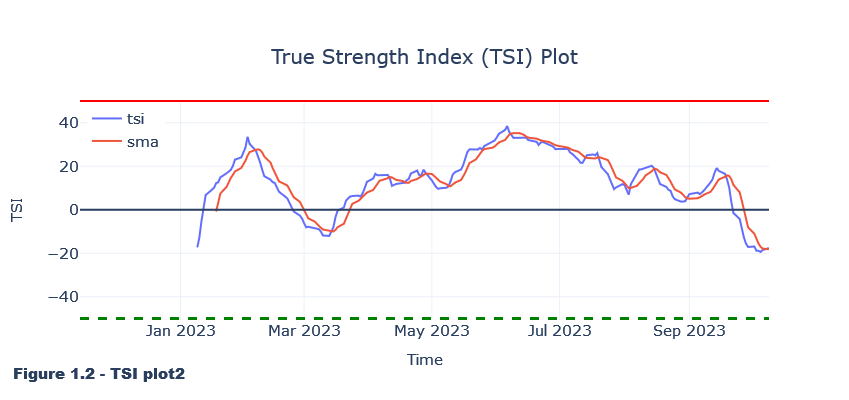

In [126]:
n = 2

text = f"Figure 1.{n} - TSI plot2 "

fig = px.line(tsi_ind, y=["tsi", "sma"], title="True Strength Index (TSI) Plot")
fig.add_hline(y=0.0)
fig.add_hline(y=50.0, line_color="red")
fig.add_hline(y=-50.0,line_width=3, line_dash="dash", line_color="green")
fig = format_plot(fig, ylabel="TSI", text=text)
fig.update_layout(legend=dict(
    orientation="v",
    entrywidth=70,
    yanchor="top",
    y=1.02,
    xanchor="right",
    x=1
))

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

# fig.write_image("imgs/chapter_3/line_plot.png")
fig.show()


n += 1

```{important} Visualization

# Visualization

```

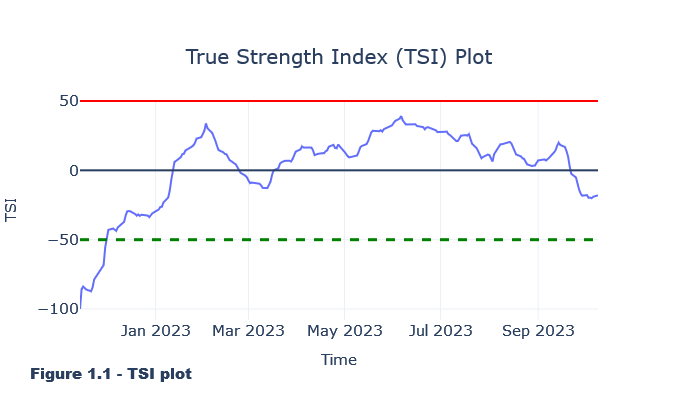

In [119]:
n = 1
text = f"Figure 1.{n} - TSI plot "

fig = px.line(df, y="TSI", title="True Strength Index (TSI) Plot")
fig.add_hline(y=0.0)
fig.add_hline(y=50.0, line_color="red")
fig.add_hline(y=-50.0,line_width=3, line_dash="dash", line_color="green")
fig = format_plot(fig, ylabel="TSI", text=text)
# fig.write_image("imgs/chapter_3/line_plot.png")
fig.show()


n += 1

```{note} Interpretation

```

In [52]:
# Clean NaN values
df = dropna(df)

In [109]:
# Initialize Bollinger Bands Indicator
tsi_ind = TSIIndicator(close=df["Close"]).tsi().to_frame()

In [110]:
tsi_ind["sma"] = tsi_ind.tsi.rolling(7).mean()
tsi_ind["ema"] = tsi_ind.tsi.ewm(span=7).mean()
tsi_ind["cma"] = df["Close"].expanding().mean()
tsi_ind["close"] = df["Close"]

In [111]:
tsi_ind.head()

,tsi,sma,ema,cma,close
Date,,,,,
2022-11-14,NaN,NaN,NaN,98.489998,98.489998
2022-11-15,NaN,NaN,NaN,98.715000,98.940002
2022-11-16,NaN,NaN,NaN,98.183334,97.120003
2022-11-17,NaN,NaN,NaN,97.350000,94.849998
2022-11-18,NaN,NaN,NaN,96.708000,94.139999


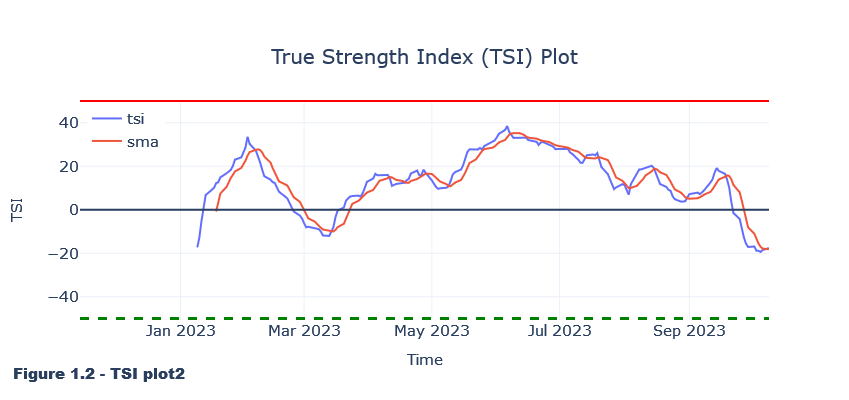

In [126]:
n = 2

text = f"Figure 1.{n} - TSI plot2 "

fig = px.line(tsi_ind, y=["tsi", "sma"], title="True Strength Index (TSI) Plot")
fig.add_hline(y=0.0)
fig.add_hline(y=50.0, line_color="red")
fig.add_hline(y=-50.0,line_width=3, line_dash="dash", line_color="green")
fig = format_plot(fig, ylabel="TSI", text=text)
fig.update_layout(legend=dict(
    orientation="v",
    entrywidth=70,
    yanchor="top",
    y=1.02,
    xanchor="right",
    x=1
))

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

# fig.write_image("imgs/chapter_3/line_plot.png")
fig.show()


n += 1

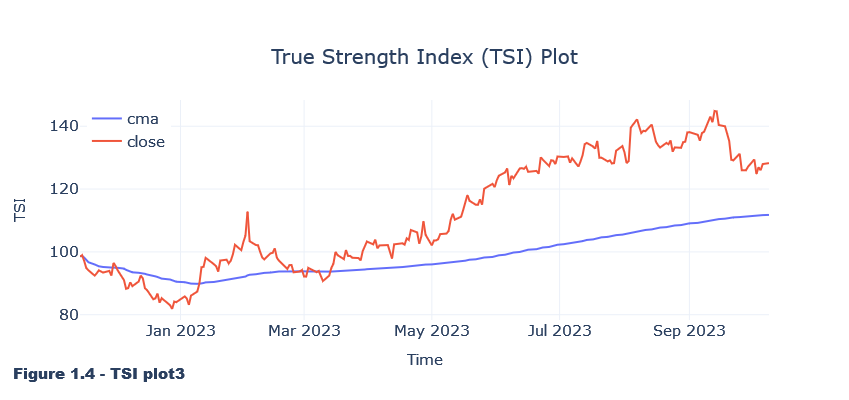

In [128]:
text = f"Figure 1.{n} - TSI plot3 "

fig = px.line(tsi_ind, y=["cma", "close"], title="True Strength Index (TSI) Plot")
fig = format_plot(fig, ylabel="TSI", text=text)
# fig.write_image("imgs/chapter_3/line_plot.png")
fig.update_layout(legend=dict(
    yanchor="top",
    orientation="v",
    y=0.99,
    xanchor="left",
    x=0.01
))

fig.show()


n += 1